# Procesamiento de datos numéricos con Python

Ahora vamos a implementar los conceptos de clases pasadas para poder procesar datos adecuadamente.

## Escalamiento-Normalización de datos numéricos

### Transformaciones lineales

La idea de escalar los datos es ayudar al algoritmo para que logre la convergencia y así ejecutar un desempeño optimo para el que fue diseñado originalmente.

Usaremos la librería `timeit` para medir la ejecución y el desempeño de cada algoritmo. También vamos a usar `scikit learn` que nos va a permitir descargar **datasets** y la función `linear_model` que nos permitirá realizar una regresión lineal sencilla, solo para validar el efecto de transformar los datos.

Para descargar la librería ejecutamos el siguiente comando, en la terminal de Ubuntu, ademas dde ver la version:
```bash
conda install scikit-learn
conda list scikit
``` 

In [41]:
# Importando librerías
import timeit
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model

In [5]:
#Cargando dataset
x,y = datasets.load_diabetes(return_X_y=True)
#Aquí lo ajusto al formato de entrada del preprocesamiento
raw=x[:,None,2]

#### Detalles del dataset
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

La transformación: `raw = X[:, None, 2]`    
Esta transformación puede crear un poco de confusión si no conoces algunos detalles sobre NumPy. Para las dudas te detallo un poco que hizo en esta línea de código.

**Note:** X tiene un shape de `(442, 10)` para nuestro estudio solo necesitamos una columna, buscamos tener un raw con shape `(442, 1)`

- **:** toma todas las columnas y filas.
- **None** indica la transformación del arreglo (newaxis)
- **2** Selecciona la 3ra columna de X.
  
> Más información sobre [Numpy Newaxis](https://numpy.org/doc/stable/reference/constants.html#numpy.newaxis)

### Explicación
Para tener un contexto de qué son los datos con los que estamos trabajando.

Tenemos un set de datos de **442** pacientes de diabetes. Se tienen **10** columnas con los datos de `"age, sex, body mass index, average blood pressure, and six blood serum measurements"`. Estos datos corresponden a la variable que llamamos "x". La variable "y" corresponde a `"a quantitative measure of disease progression one year after baseline"`.

https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

al ejecutar la linea

```python
raw = X[:, None, 2]
```
estamos tomando solo la columna del índice de masa corporal.

Los datos del dataset ya vienen pre-escalados y centrados en la media.

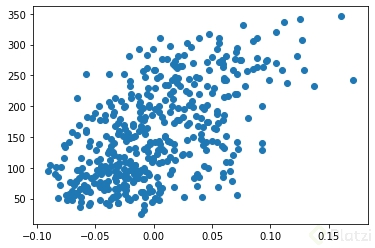

>Si graficamos los datos con un Scatterplot vemos que hay cierta relación entre el índice de masa corporal y la progresión de la enfermedad, por eso es que realizamos una regresión lineal, para predecir que tan avanzada está la enfermedad a partir del índice de masa corporal.

### Continuamos
Una vez que ya tenemos los datos crudos (raw), vamos a definir las reglas de escalamiento. En este caso vamos con $max-min$, para esto vamos a encontrar la ecuación correspondiente a partir de la <a href="#ec_gen">ecuación general</a>.

#### Ecuación con intervalo $[a,b]\rightarrow [-1,1]$

$$
\begin{gather*}
    \\ X_s=a+\frac{(X-X_{min})(b-a)}{X_{max}-X_{min}} \\\\
    X_s=-1+\frac{(X-X_{min})(1-(-1))}{X_{max}-X_{min}} \\\\
    X_s=-1+\frac{(X-X_{min})(2)}{X_{max}-X_{min}} \\\\
    \text{Re ordenando}\\\\
    X_s=\frac{2X-2X_{min}}{X_{max}-X_{min}}-1\\\\
    X_s=\frac{2X-2X_{min}}{X_{max}-X_{min}}-\frac{X_{max}-X_{min}}{X_{max}-X_{min}}\\\\
    X_s=\frac{2X-2X_{min}-X_{max}+X_{min}}{X_{max}-X_{min}}\\\\
    \text{Finalmente tenemos}\\\\
    X_s=\frac{2X-X_{min}-X_{max}}{X_{max}-X_{min}}\\
\end{gather*}
$$

## Escalamiento Max-Min

In [6]:
#Reglas de escalamiento

#Estableciendo máximo y mínimo de los datos
max_raw=max(raw)
min_raw=min(raw)

#Aplicando el algoritmo de escalamiento
Xsca_minmax=(2*raw-max_raw-min_raw)/(max_raw-min_raw)

Antes de todo nosotros tenemos que tener en cuenta la distribución de nuestros datos, para poder verificar como se ha hecho el **escalamiento**. Es decir hay que comparar los datos ***antes*** y ***después*** del proceso de **escalamiento**.

(array([32., 66., 98., 90., 61., 53., 23., 12.,  5.,  2.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

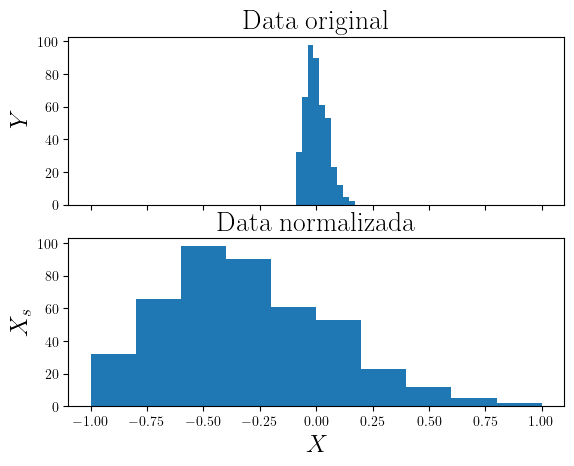

In [21]:
#Configurando Latex
# Configuración de Matplotlib para usar LaTeX
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "text.latex.preamble": r"\usepackage{amsmath}"
})

#Validar el modelo
#Crear gráficos
fig,axes=plt.subplots(2,1,sharex=True)
#Ajustando parámetros de Figura 1
axes[0].set_title('Data original',fontsize=20)
axes[0].set_ylabel('$Y$',fontsize=18)
axes[0].hist(raw)

#Ajustando parámetros de Figura 2
axes[1].set_title('Data normalizada',fontsize=20)
axes[1].set_xlabel('$X$',fontsize=18)
axes[1].set_ylabel('$X_s$',fontsize=18)
axes[1].hist(Xsca_minmax)

Creando un arreglo de gráficos. Cada arreglo de gráficos tiene un objeto `axes`, y así organizar como quieres tus gráficas. Le indicamos que queremos **2** filas y **1** columna ademas con `sharex=True` le decimos que comparta el **eje x**, para ver el efecto del **escalamiento**.

### Entrenando datos escalados
Luego de que tenemos el escalamiento realizado, vamos a definir una función para entrenar el modelo. Luego de entrenar el modelo, vamos mandar la función `linear_model` con **scikit-learn** y que de ahí use una **regresión lineal** y que ese modelo de regresión lineal lo ajuste a unos datos.

Recordemos:
```python
#Cargando dataset
x,y = datasets.load_diabetes(return_X_y=True)
```
>Donde la variable `y` al inicio era la variable que hay que predecir suponiendo un modelo. 

In [22]:
# Modelos para entrenamiento Pt1
def train_raw():
    linear_model.LinearRegression().fit(raw,y)

Es similar a la función anterior, pero ahora tomamos los datos escalados como entrada. Guardo estas 2 funciones y ya estoy listo.

In [23]:
# Modelos para entrenamiento Pt2
def train_scaled():
    linear_model.LinearRegression().fit(Xsca_minmax,y)

Con esto quedaría listo, pero después necesito medir como es el entrenamiento cuando el modelo se ajusta a los datos escalados.

### Midiendo los tiempos de ejecución
Con la función `timeit`voy a medir los tiempos de ejecución de los modelos que definí anteriormente, así mismo voy a testear un pedazo de código de las funciones anteriores y repetirlo $100$ veces para obtener el **tiempo de ejecución.**

El argumento `number=100` lo que hace es repetir el snippet de código de la función $100$ veces y sobre eso se calcula el tiempo.

In [30]:
#Tiempo en train_raw
raw_time=timeit.timeit(train_raw,number=100)

#Tiempo en train_scaled
scaled_time=timeit.timeit(train_scaled,number=100)

#Obteniendo resultados
print(f"Tiempo en train_raw: {raw_time}\n\
Tiempo en train_scaled: {scaled_time}")

Tiempo en train_raw: 0.09048780000011902
Tiempo en train_scaled: 0.06521260000045004


El tiempo que obtenemos precisamente es el esperado, la idea es que; yo entreno un modelo con los datos `raw` y entreno ese mismo modelo con los datos `escalados` y obtenemos una reducción en tiempo, porque: 
>el escalamiento de los datos ayuda a que el algoritmo llegue mas rápido a la convergencia.

### IMPORTANTE
Considera lo siguiente para los escalamientos
- $max-min:$ Mejor para datos uniformemente distribuidos.
- $Z-Score:$ Mejor para datos distribuidos `normalmente` (Forma de campana de Gauss)

## Reto:
Haz lo mismo pero para $Z-Score$

## Z-Score
Recordando como obtener la normalizacion $Z.Score$
$$X_s=\frac{X-\mu} {\sigma}$$

In [32]:
#Obteniendo parámetros de la normalización

#Promedio
med_z=raw.mean()

#Desviación estándar
desv_z=raw.std()

#Normalizando por Z-Score
Xs_z=(raw-med_z)/desv_z

### Validando el modelo

(array([32., 66., 98., 90., 61., 53., 23., 12.,  5.,  2.]),
 array([-1.89792941, -1.34956464, -0.80119987, -0.2528351 ,  0.29552967,
         0.84389444,  1.39225921,  1.94062398,  2.48898875,  3.03735352,
         3.58571828]),
 <BarContainer object of 10 artists>)

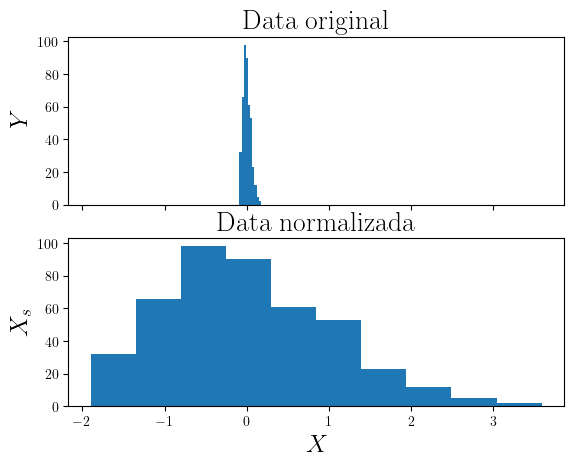

In [44]:
#Configurando Latex
# Configuración de Matplotlib para usar LaTeX
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "text.latex.preamble": r"\usepackage{amsmath}"
})

#Validar el modelo
#Crear gráficos
fig,axes=plt.subplots(2,1,sharex=True)
#Ajustando parámetros de Figura 1
axes[0].set_title('Data original',fontsize=20)
axes[0].set_ylabel('$Y$',fontsize=18)
axes[0].hist(raw)

#Ajustando parámetros de Figura 2
axes[1].set_title('Data normalizada',fontsize=20)
axes[1].set_xlabel('$X$',fontsize=18)
axes[1].set_ylabel('$X_s$',fontsize=18)
axes[1].hist(Xs_z)

### Entrenando modelo

In [34]:
# Modelos para entrenamiento Pt3
# Definiendo función para datos normalizados
def train_ScZ():
    linear_model.LinearRegression().fit(Xs_z,y)

### Midiendo los tiempos de ejecución

In [35]:
#Tiempo en train_raw
raw_time=timeit.timeit(train_raw,number=100)

#Tiempo en train_ScZ
ScZ_time=timeit.timeit(train_ScZ,number=100)

#Obteniendo resultados
print(f"Tiempo en train_raw: {raw_time}\n\
Tiempo en train_ScZ: {ScZ_time}")

Tiempo en train_raw: 0.1727132010000787
Tiempo en train_ScZ: 0.066640801000176


### Comparación final
Por último vamos a comparar los 3.
- Raw
- Min- Max
- Z-Score

In [36]:
#Tiempo en train_raw
raw_time=timeit.timeit(train_raw,number=100)

#Tiempo en train_ScZ
ScZ_time=timeit.timeit(train_ScZ,number=100)

#Tiempo en train_scaled
scaled_time = timeit.timeit(train_scaled,number=100)

#Obteniendo resultados
print(f"Tiempo en train_raw: {raw_time}\n\
Tiempo en train_ScZ: {ScZ_time}\n\
Tiempo en train_scaled: {scaled_time}")

Tiempo en train_raw: 0.08325669999976526
Tiempo en train_ScZ: 0.08289069999955245
Tiempo en train_scaled: 0.06587330000002112


Como se puede observar, el mejor tiempo es de normalización **Min-Max**. Repliquemos para verificarlo

In [37]:
#Tiempo en train_raw
raw_time=timeit.timeit(train_raw,number=100)

#Tiempo en train_ScZ
ScZ_time=timeit.timeit(train_ScZ,number=100)

#Tiempo en train_scaled
scaled_time = timeit.timeit(train_scaled,number=100)

#Obteniendo resultados
print(f"Tiempo en train_raw: {raw_time}\n\
Tiempo en train_ScZ: {ScZ_time}\n\
Tiempo en train_scaled: {scaled_time}")

Tiempo en train_raw: 0.09972589999961201
Tiempo en train_ScZ: 0.07033380099892383
Tiempo en train_scaled: 0.09335830000054557


Ahora el mejor tiempo es con la normalización **Z-Score**. Uno ultimo.

In [38]:
#Tiempo en train_raw
raw_time=timeit.timeit(train_raw,number=100)

#Tiempo en train_ScZ
ScZ_time=timeit.timeit(train_ScZ,number=100)

#Tiempo en train_scaled
scaled_time = timeit.timeit(train_scaled,number=100)

#Obteniendo resultados
print(f"Tiempo en train_raw: {raw_time}\n\
Tiempo en train_ScZ: {ScZ_time}\n\
Tiempo en train_scaled: {scaled_time}")

Tiempo en train_raw: 0.08827949999977136
Tiempo en train_ScZ: 0.07394709999971383
Tiempo en train_scaled: 0.09009879999939585


## Scikit Learn
[Preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html). **Scikit** tiene una parte que es el pre-procesamiento es una parte muy completa y se refiere a Estandarizar o Normalizar datos numéricos como categóricos.

Aquí es importante y lo vamos a encontrar en clases de estadística en libros, que aveces se refieren a la **Normalización Z** como **Normalización de una variable**.

## Transformaciones no lineales
Recordemos el data set `dars` que tiene datos no lineales

<Axes: >

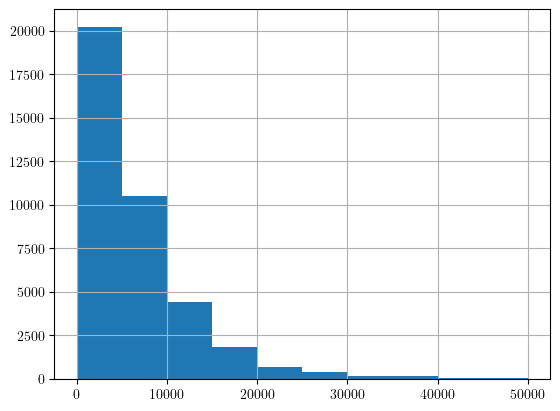

In [46]:
# importando
df_cars =pd.read_csv('dataset/cars.csv')

# Accediendo a una columna especifica
df_cars.price_usd.hist()

### Transformación no lineal
Usaremos $tanh(x)$ para hacer el proceso de transformación

Aplicaremos la normalización por 2 formas.
- Sobre el frame
- Sobre la variable

<Axes: >

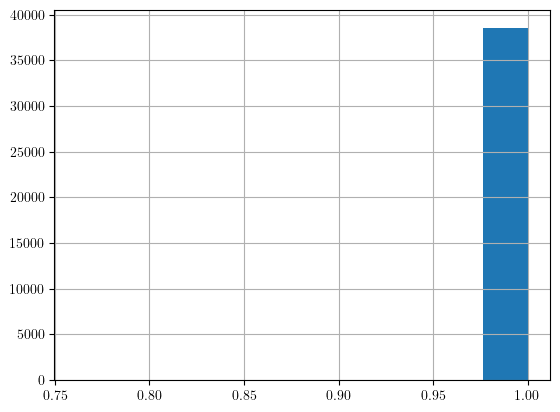

In [51]:
# Aplicando la transformación no lineal
# Sobre el data frame
df_cars.price_usd.apply(lambda x:np.tanh(x)).hist()

Lo que vemos es que la función necesita ser ajustada para que tengamos una buena normalización. Recuerda que teníamos la ecuación:
$$X_s=tan\left(\frac x a \right) $$

Ajustaremos el valor de $a$

<Axes: >

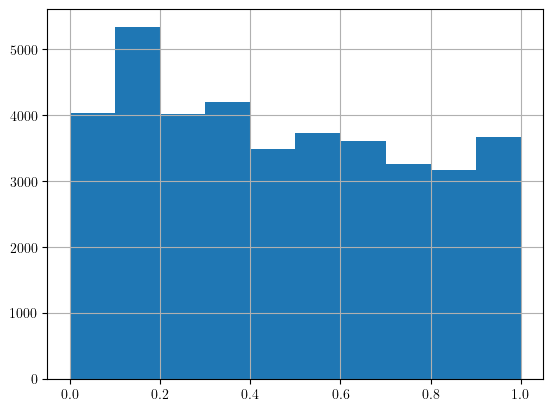

In [58]:
# Aplicando la transformación no lineal
# Sobre el data frame
a=10000
df_cars.price_usd.apply(lambda x:np.tanh(x/a)).hist()

Esto es solo una parte de todo lo que podemos hacer con transformaciones. Para mayor información consulta [Map data to a normal distribution](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html).

Dependiendo del caso de uso vamos a tener que usar un tipo u otro de transformación. 

# Extras:
- [Numpy](https://numpy.org/)
- [Pandas](https://pandas.pydata.org/docs/index.html)
- [Matplotlib](https://matplotlib.org/)
- [Sklearn](https://scikit-learn.org/stable/index.html)
- [Seaborn](https://seaborn.pydata.org/tutorial/distributions.html)

#### Me sigue pareciendo extraña la fórmula de escalamiento *min-max*. Según los libros de estadística y la misma función de Sklearn, la fórmula es: 

<h4 id="ec_01">Ecuación con intervalo [0,1]</h4>

$$\frac{x-min(x)}{max(x)-min(x)}$$

Hola! La fórmula está correcta. Lo que pasa es que la fórmula que comentas es para un rango de **[0, 1]** y el rango en el que estamos trabajando es del **[-1, 1]**. La fórmula general del escalamiento Mín-max es:

<h4 id="ec_gen">Ecuación general</h4>

$$X_s=a+\frac{(X-X_{min})(b-a)}{X_{max}-X_{min}}$$
Donde el rango de valores se encuentran entre el conjunto de valores a y b.

Para este ejemplo: el rango → $[a, b] = [-1, 1]$. Si reemplazas en la ecuación y la resuelves. El resultado es el descrito por el profesor.

#### Lectura recomendada:

- [Normalization (statistics) → wikipedia](https://en.wikipedia.org/wiki/Normalization_(statistics))
- [Feature scaling → wikipedia](https://en.wikipedia.org/wiki/Feature_scaling)
- [Map data to a normal distribution](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html)